In [139]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [140]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#This zip objects packs each pair of lats and lngs having the same index in their respective array into a tuple

In [141]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [142]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [143]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

622

## Retrieve City Weather Data

In [144]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [145]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sakakah
Processing Record 2 of Set 1 | inongo
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1 | dingle
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | sandwick
Processing Record 10 of Set 1 | mandan
Processing Record 11 of Set 1 | sobolevo
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | paamiut
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | najran
Processing Record 22 of Set 1

City not found. Skipping...
Processing Record 36 of Set 4 | new norfolk
Processing Record 37 of Set 4 | labuhan
Processing Record 38 of Set 4 | jacaleapa
Processing Record 39 of Set 4 | leningradskiy
Processing Record 40 of Set 4 | spirit river
Processing Record 41 of Set 4 | vegreville
Processing Record 42 of Set 4 | toliary
City not found. Skipping...
Processing Record 43 of Set 4 | kudahuvadhoo
Processing Record 44 of Set 4 | marzuq
Processing Record 45 of Set 4 | riyadh
Processing Record 46 of Set 4 | nhamunda
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | makakilo city
Processing Record 49 of Set 4 | bonthe
Processing Record 50 of Set 4 | astoria
Processing Record 1 of Set 5 | nikolskoye
Processing Record 2 of Set 5 | ketchikan
Processing Record 3 of Set 5 | gat
Processing Record 4 of Set 5 | henties bay
Processing Record 5 of Set 5 | babushkin
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | navalgund
Processing Record 8 of Set 5 |

Processing Record 25 of Set 8 | grand gaube
Processing Record 26 of Set 8 | khrebtovaya
Processing Record 27 of Set 8 | barawe
City not found. Skipping...
Processing Record 28 of Set 8 | folkestone
Processing Record 29 of Set 8 | am timan
Processing Record 30 of Set 8 | pringsewu
Processing Record 31 of Set 8 | lakes entrance
Processing Record 32 of Set 8 | samdrup jongkhar
Processing Record 33 of Set 8 | guerrero negro
Processing Record 34 of Set 8 | evensk
Processing Record 35 of Set 8 | wendo
Processing Record 36 of Set 8 | grindavik
Processing Record 37 of Set 8 | rudnaya pristan
Processing Record 38 of Set 8 | fomboni
Processing Record 39 of Set 8 | dakar
Processing Record 40 of Set 8 | gondanglegi
Processing Record 41 of Set 8 | prince rupert
Processing Record 42 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | chuy
Processing Record 45 of Set 8 | talara
Processing Record 46 of Set 8 | gaya
Processing Record 

Processing Record 11 of Set 12 | oranjestad
Processing Record 12 of Set 12 | jiangyou
Processing Record 13 of Set 12 | kyra
Processing Record 14 of Set 12 | husavik
Processing Record 15 of Set 12 | luis correia
Processing Record 16 of Set 12 | ojinaga
Processing Record 17 of Set 12 | odweyne
Processing Record 18 of Set 12 | chupa
Processing Record 19 of Set 12 | mzimba
Processing Record 20 of Set 12 | goderich
Processing Record 21 of Set 12 | felanitx
Processing Record 22 of Set 12 | maragogi
Processing Record 23 of Set 12 | balimo
City not found. Skipping...
Processing Record 24 of Set 12 | flinders
Processing Record 25 of Set 12 | yar-sale
Processing Record 26 of Set 12 | munak
Processing Record 27 of Set 12 | krasnoselkup
Processing Record 28 of Set 12 | acarau
Processing Record 29 of Set 12 | bokoro
Processing Record 30 of Set 12 | kyshtovka
Processing Record 31 of Set 12 | yarada
Processing Record 32 of Set 12 | wadi musa
Processing Record 33 of Set 12 | gardan diwal
City not foun

In [146]:
len(city_data)

563

In [147]:
#Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sakakah,29.97,40.21,59.00,54,40,3.36,SA,2020-11-20 06:55:37
1,Inongo,-1.95,18.27,73.62,91,100,3.33,CD,2020-11-20 06:59:06
2,Hermanus,-34.42,19.23,69.01,62,0,11.99,ZA,2020-11-20 06:59:07
3,Souillac,-20.52,57.52,73.40,88,75,3.36,MU,2020-11-20 06:59:07
4,Dingle,11.00,122.67,85.12,77,99,9.15,PH,2020-11-20 06:59:07
5,Kaitangata,-46.28,169.85,57.99,93,100,5.99,NZ,2020-11-20 06:54:12
6,Sandwick,60.00,-1.25,42.80,73,75,11.41,GB,2020-11-20 06:59:08
7,Mandan,46.83,-100.89,32.00,100,75,9.17,US,2020-11-20 06:59:08
8,Sobolevo,54.43,31.90,32.88,96,100,15.75,RU,2020-11-20 06:59:08
9,Punta Arenas,-53.15,-70.92,51.80,66,40,5.82,CL,2020-11-20 06:59:08


In [148]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sakakah,SA,2020-11-20 06:55:37,29.97,40.21,59.00,54,40,3.36
1,Inongo,CD,2020-11-20 06:59:06,-1.95,18.27,73.62,91,100,3.33
2,Hermanus,ZA,2020-11-20 06:59:07,-34.42,19.23,69.01,62,0,11.99
3,Souillac,MU,2020-11-20 06:59:07,-20.52,57.52,73.40,88,75,3.36
4,Dingle,PH,2020-11-20 06:59:07,11.00,122.67,85.12,77,99,9.15
5,Kaitangata,NZ,2020-11-20 06:54:12,-46.28,169.85,57.99,93,100,5.99
6,Sandwick,GB,2020-11-20 06:59:08,60.00,-1.25,42.80,73,75,11.41
7,Mandan,US,2020-11-20 06:59:08,46.83,-100.89,32.00,100,75,9.17
8,Sobolevo,RU,2020-11-20 06:59:08,54.43,31.90,32.88,96,100,15.75
9,Punta Arenas,CL,2020-11-20 06:59:08,-53.15,-70.92,51.80,66,40,5.82


In [149]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [150]:
#Extract relevant fields from the data frame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

## Plotting Weather Data

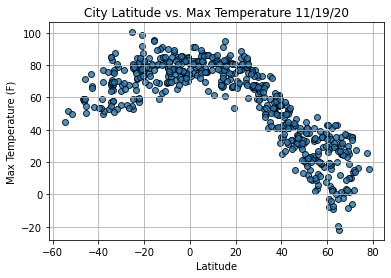

In [151]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig1.png')

#Show plot
plt.show()

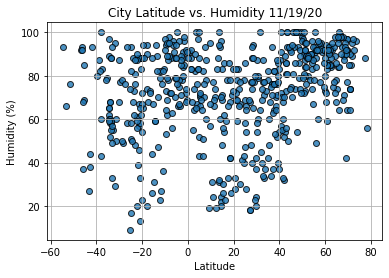

In [152]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()

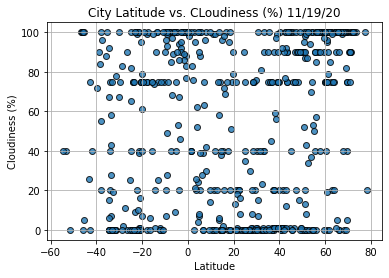

In [153]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. CLoudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig3.png')

#Show plot
plt.show()

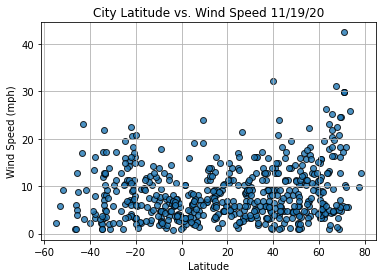

In [154]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig4.png')

#Show plot
plt.show()

## Finding Correlation

In [155]:
#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line with the equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [156]:
#Create Northern and Southern Hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sakakah,SA,2020-11-20 06:55:37,29.97,40.21,59.00,54,40,3.36
4,Dingle,PH,2020-11-20 06:59:07,11.00,122.67,85.12,77,99,9.15
6,Sandwick,GB,2020-11-20 06:59:08,60.00,-1.25,42.80,73,75,11.41
7,Mandan,US,2020-11-20 06:59:08,46.83,-100.89,32.00,100,75,9.17
8,Sobolevo,RU,2020-11-20 06:59:08,54.43,31.90,32.88,96,100,15.75


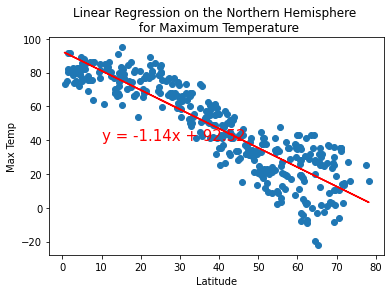

In [157]:
#Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

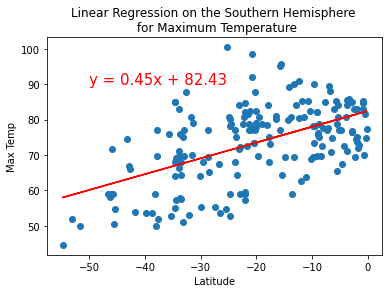

In [158]:
#Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-50,90))

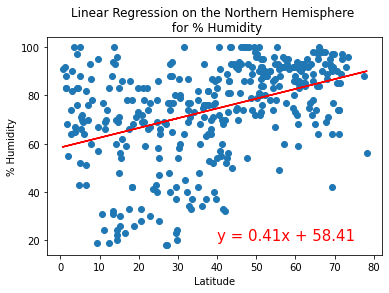

In [159]:
#Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (40,20))

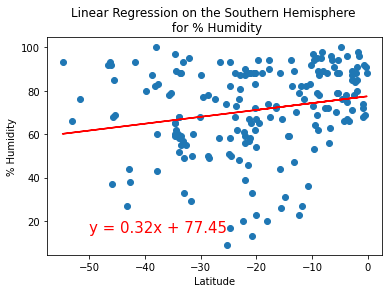

In [160]:
#Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-50,15))

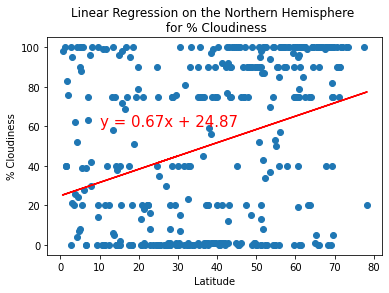

In [161]:
#Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (10,60))

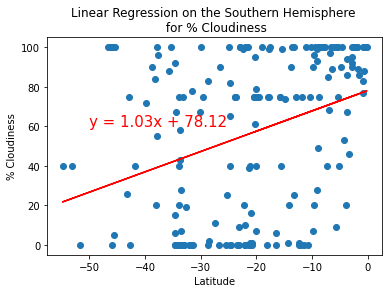

In [162]:
#Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-50,60))

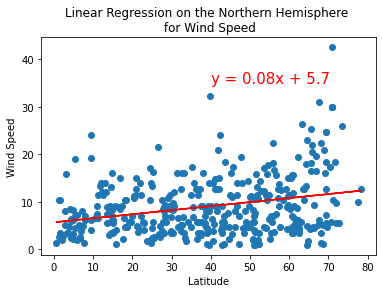

In [163]:
#Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (40,35))

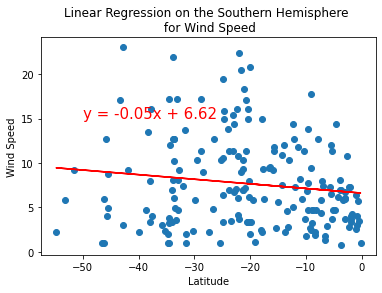

In [164]:
#Linear regression on the Southern Hemisphere (Wind Speed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (-50,15))